# Clean And Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institutes in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

We will play the role of data analyst and pretend our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

In [1]:
import numpy as np
import pandas as pd

In [2]:
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

## Exploring the data

### DETE survey

In [3]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The DETE dataset contains 822 rows and 52 columns. Columns contain three types of data: one int64 for `ID`, strings (objects) and booleans that are used to help clarify the reason of resignation (e.g columns: Job dissatisfaction, lack of recognition). 
Most columns contain more that 700 non-null entries, however some columns have a surprisingly low number of entries.
We also notice from the table above that some entries are filled with `Not Stated`.


In [4]:
dete_survey['Job dissatisfaction'].value_counts(dropna=False)

False    733
True      89
Name: Job dissatisfaction, dtype: int64

In [5]:
dete_survey['Professional Development'].value_counts(dropna=False)

A      413
SA     184
N      103
D       60
SD      33
M       15
NaN     14
Name: Professional Development, dtype: int64

In [6]:
dete_survey.isnull().sum().sort_values()

ID                                       0
Workload                                 0
Work life balance                        0
Traumatic incident                       0
Ill Health                               0
Study/Travel                             0
Relocation                               0
Maternity/family                         0
Employment conditions                    0
Work location                            0
Lack of job security                     0
Lack of recognition                      0
Physical work environment                0
Dissatisfaction with the department      0
None of the above                        0
Interpersonal conflicts                  0
Job dissatisfaction                      0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Career move to public sector             0
Career move to private sector            0
Region     

The `Aboriginal`, `Torres Strait`, `South Sea`, `Disability` and `NESB` columns all have more than 790 Null values. We will have to deal with them.

Some of the columns we will work with are:

* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE


### TAFE survey

In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [8]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The TAFE dataset contains 702 rows and 72 columns. It contains strings and 2 float64 (`Record ID` and `CESSATION YEAR`). The data is a lot harder to understand than DETE because of the long titles, which makes the `info()` function less useful. 
Let us take a look at the Null values in the table:

In [9]:
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?                                                                                                     589
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                                                                    270
Contributing Factors. Ill Health                                                                                                                                 265
Contributing Factors. Maternity/Family                                                                                                                           265
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributing Factors. NONE                                                                                                                                       265
Contributi

The column with the most Null values is `Main Factor. Which of these was the main factor for leaving? ` (589 null values). 20 other columns have more than 147 missing values.

Some of the columns we will work with are:

* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)


### Observations and first steps

* The `dete_survey` dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as `NaN`.
* Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start we will handle the first two issues.

In [10]:
dete_survey=pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [11]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

We read the `dete_survey.csv` file again but this time with `Not Stated` values as NaN.

We also removed columns that will not be of use with regard to the questions that we are asked to answer. These are the columns we dropped:

In [12]:
for column in dete_survey.columns[28:49]:
    print('* ',column)
    

*  Professional Development
*  Opportunities for promotion
*  Staff morale
*  Workplace issue
*  Physical environment
*  Worklife balance
*  Stress and pressure support
*  Performance of supervisor
*  Peer support
*  Initiative
*  Skills
*  Coach
*  Career Aspirations
*  Feedback
*  Further PD
*  Communication
*  My say
*  Information
*  Kept informed
*  Wellness programs
*  Health & Safety


In [13]:
for column in tafe_survey.columns[17:66]:
    print('* ',column)

*  Main Factor. Which of these was the main factor for leaving?
*  InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction
*  InstituteViews. Topic:2. I was given access to skills training to help me do my job better
*  InstituteViews. Topic:3. I was given adequate opportunities for personal development
*  InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%
*  InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had
*  InstituteViews. Topic:6. The organisation recognised when staff did good work
*  InstituteViews. Topic:7. Management was generally supportive of me
*  InstituteViews. Topic:8. Management was generally supportive of my team
*  InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me
*  InstituteViews. Topic:10. Staff morale was positive within the Institute
*  InstituteViews. Topic:11. If I had a workplace issue

## Cleaning column names

In [14]:
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [15]:
dete_survey_updated.rename(columns={'separationtype':'separation_type'},inplace=True)

In [16]:
rename_map={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separation_type',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(columns=rename_map,inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

We standardized the names of the DETE columns to the snake_case format. We did the same for the TAFE dataset by changing most of the names which makes the column names much more readable. We will deal with the remaining of the TAFE dataset column names later on in the project.

## Filtering the data
Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the `separation_type` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.


In [17]:
dete_survey_updated['separation_type'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

In [18]:
tafe_survey_updated['separation_type'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64

Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

In [19]:
dete_resignations=dete_survey_updated[(dete_survey_updated['separation_type']=='Resignation-Other reasons')|(dete_survey_updated['separation_type']=='Resignation-Other employer')|(dete_survey_updated['separation_type']=='Resignation-Move overseas/interstate')]
dete_resignations.shape

(311, 35)

311/822 of the surveyed employees resigned

In [20]:
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separation_type']=='Resignation']
tafe_resignations.shape

(340, 23)

340/720 of the employees resigned

## Verifying the Data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge).
In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. However, we encourage you to check the data for other issues as well!

* Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [21]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2012      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [22]:
dete_resignations['cease_date']=dete_resignations['cease_date'].str.split(pat='/').str[-1].astype(float).copy()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [24]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [25]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In both datasets, none of the dates exceed 2014 (the year in which the dataset was created). As for the DETE start dates, none of them was before 1940. Therefore, as far as for the dates the dataset is valid.

We can observe that some start dates are as old as 1971. On the other hand, the cease dates are all greater or equal to 2010 which means the employees resigned not so long ago, hence the data is still relevant. 

## Years of service

Recall that our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their *years of service*.

The `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.


In [26]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
dete_resignations['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

## Identifying dissatisfied employees

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 
1. tafe_survey_updated:
  * Contributing Factors. Dissatisfaction
  * Contributing Factors. Job Dissatisfaction
2. dafe_survey_updated:
  * job_dissatisfaction
  * dissatisfaction_with_the_department
  * physical_work_environment
  * lack_of_recognition
  * lack_of_job_security
  * work_location
  * employment_conditions 
  * work_life_balance
  * workload
  
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.


In [28]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [29]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [30]:
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element=='-':
        return False
    else :return True

dissatisfied=tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].copy().applymap(update_vals)
tafe_resignations_up=tafe_resignations.copy()
tafe_resignations_up['dissatisfied']=dissatisfied.any(axis=1,skipna=False)

In [31]:
dete_indications=dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']]
dete_resignations_up=dete_resignations.copy()
dete_resignations_up['dissatisfied']=dete_indications.any(axis=1,skipna=False)


## Combining the data

We are now reading to combine our datasets but first let us add a column to each dataframe that will allow us to easily distinguish between the two.

In [32]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [33]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up],sort=False)
combined.shape

(651, 53)

In [34]:
combined_updated=combined.dropna(thresh=500,axis=1)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
id                   651 non-null float64
separation_type      651 non-null object
cease_date           635 non-null float64
position             598 non-null object
employment_status    597 non-null object
gender               592 non-null object
age                  596 non-null object
institute_service    563 non-null object
dissatisfied         643 non-null object
institute            651 non-null object
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


## Cleaning the service column 

The `institute_service` is tricky to clean beacause it currently contains values in a couple different forms: 

In [35]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on [this](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [36]:
combined_updated['institute_service']=combined_updated['institute_service'].astype(str)
combined_updated['institute_service']=combined_updated['institute_service'].replace('Less than 1 year','1')
combined_updated['institute_service']=combined_updated['institute_service'].replace('More than 20 years','2')
combined_updated['institute_service']=combined_updated['institute_service'].str.split(pat='-').str[-1]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [37]:
combined_updated['institute_service'].value_counts()

nan     88
2       74
1       73
4       63
6       33
20      26
5.0     23
1.0     22
10      21
0.0     20
3.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
8.0      8
13.0     8
20.0     7
15.0     7
10.0     6
17.0     6
22.0     6
12.0     6
14.0     6
16.0     5
18.0     5
24.0     4
11.0     4
23.0     4
21.0     3
19.0     3
32.0     3
39.0     3
28.0     2
25.0     2
36.0     2
30.0     2
26.0     2
27.0     1
41.0     1
49.0     1
38.0     1
33.0     1
35.0     1
34.0     1
31.0     1
29.0     1
42.0     1
Name: institute_service, dtype: int64

In [38]:
combined_updated['institute_service']=combined_updated['institute_service'].astype(float)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
def career_stage(elem):
    if pd.isnull(elem):
        return np.nan
    elif elem<3:
        return 'New'
    elif elem<7:
        return 'Experienced'
    elif elem<11:
        return 'Established'
    else: return 'Veteran'

combined_updated['service_cat']=combined_updated['institute_service'].apply(career_stage)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [40]:
combined_updated['service_cat'].head(10)

3     Established
5         Veteran
8     Experienced
9         Veteran
11    Experienced
12        Veteran
14    Experienced
16            NaN
20        Veteran
21        Veteran
Name: service_cat, dtype: object

## Initial analysis

We first have some missing values to deal with:

In [41]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [42]:
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


False    411
True     240
Name: dissatisfied, dtype: int64

In [43]:
service_cat_dissatisfaction=combined_updated.pivot_table(index='service_cat',values='dissatisfied')
service_cat_dissatisfaction=service_cat_dissatisfaction.reindex(['New','Experienced','Established','Veteran'])
service_cat_dissatisfaction

,dissatisfied
service_cat,
New,0.305419
Experienced,0.343023
Established,0.516129
Veteran,0.484127


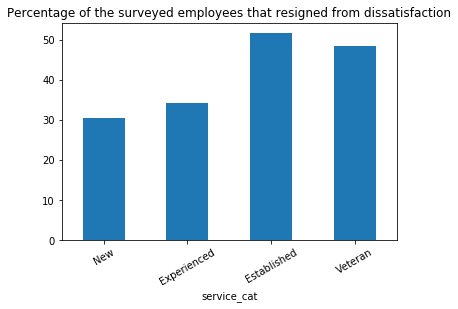

In [44]:
%matplotlib inline 


(100*service_cat_dissatisfaction).plot(kind='bar',title='Percentage of the surveyed employees that resigned from dissatisfaction',rot=30,legend=False)

* **Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**

From the  available data, we can observe that the employees that were well established within the company (7-10 years) are more likely to have resigned due to some dissatisfaction (~ 50%). The 'Veterans' (11+ years) also seem to resign due to a dissatisfaction, with a slightly lower percentage than Established employees.
On the other hand, employees who worked for the institutes for a shorter period of time show a smaller percentage of resignation due to dissatisfaction. Both new (<3 years) and experienced (3-6 years) employees have a percentage near 30%. 